# Calculating Highest Information Gain

### Entropy Formula

### $-\sum{p(x)log_2p(x)}$

### $IG(Y,X) = Entropy{(Y)}-Entropy{(Y|X)}$

How much information is gained about y, when we learn about y given X (or when we learn about x), a particular feature

* where Y = Target
* and Y|X is class of Y given the feature

### Gini Impurity

Gini Impurity = 1 - Gini

### Gini Formula

### $\sum{p_i^2}$

In [ ]:
def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)

    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')

    return(round(impurity, 3))

def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """

    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)

    target_entropy = compute_impurity(df[target], split_criterion)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()

    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        weight_list.append(round(weight_level, 3))

    # print('impurity of partitions:', entropy_list)
    # print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    # print('remaining impurity:', feature_remaining_impurity)

    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)

    print('====================')

    return(information_gain)

# https://www.featureranking.com/tutorials/machine-learning-tutorials/information-gain-computation/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = y
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import numpy as np

split_criterion = 'entropy'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criterion)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: entropy
information gain: 0.8758720000000001
target feature: species
descriptive_feature: sepal width (cm)
split criterion: entropy
information gain: 0.517269
target feature: species
descriptive_feature: petal length (cm)
split criterion: entropy
information gain: 1.446396
target feature: species
descriptive_feature: petal width (cm)
split criterion: entropy
information gain: 1.436151


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
22                4.6               3.6                1.0               0.2
15                5.7               4.4                1.5               0.4
65                6.7               3.1                4.4               1.4
11                4.8               3.4                1.6               0.2
42                4.4               3.2                1.3               0.2


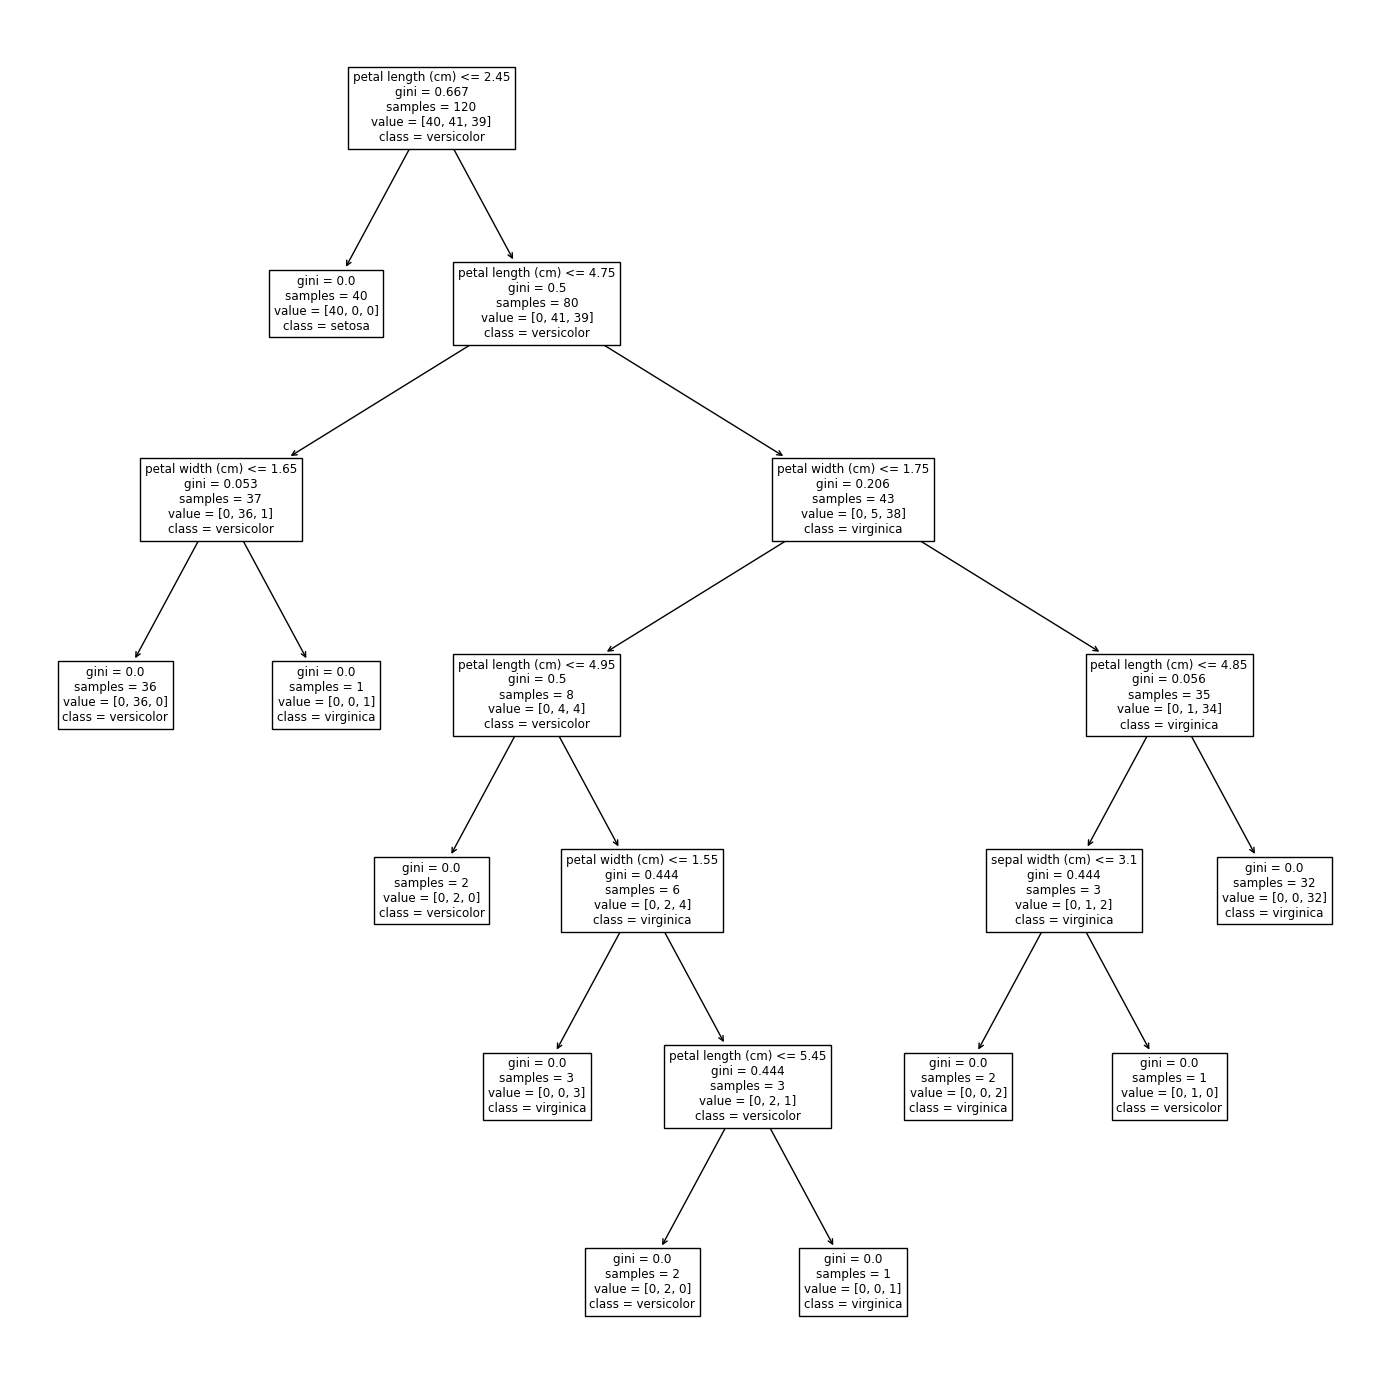

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1),
                                                    df['species'],
                                                    test_size=0.20,
                                                    random_state=42)

print(X_train.head())

model = DecisionTreeClassifier(criterion='gini', random_state=42).fit(X_train, y_train)

plt.figure(figsize=(14, 14))
tree.plot_tree(model,
              feature_names=X_train.columns,
              class_names=['setosa', 'versicolor', 'virginica'],
              filled=False)

plt.tight_layout();

In [ ]:
split_criteria = 'gini'
for feature in df.drop(columns='species').columns:
    feature_info_gain = comp_feature_information_gain(df, 'species', feature, split_criteria)

target feature: species
descriptive_feature: sepal length (cm)
split criterion: gini
information gain: 0.347094
target feature: species
descriptive_feature: sepal width (cm)
split criterion: gini
information gain: 0.199623
target feature: species
descriptive_feature: petal length (cm)
split criterion: gini
information gain: 0.604321
target feature: species
descriptive_feature: petal width (cm)
split criterion: gini
information gain: 0.604288
